## This is HNA or Hybrid SFLA-CSO Network Aligner program, and implemented by Elham Mahdipour that is Ph.D. Candidate of Artificial Intelligence at Yazd University, Yazd, Iran. 
### All copyright reserved by the author.

You can run the program from first to end and see all the results, but since the population generation process can take a time depended on the node numbers of networks, you can use the populations stored in each program. We saved the populations as the pair of related species that you can see in the input folder and load them on program, such as "ce-sc-pop.pickle". Therefore, you must run follow steps: 1) Run all cells in "Load Graphs", "Swap Graphs", "Define Target Graph",and "Compute Score for create similarity matrix" sections. 2) If you will use saved population, please upload related pickle on root of jupyter notebook, then go "load population" cell and run them; else, please run "multi tasking for initial population", "multi processing for speed up", and "Initialization such as MeAlign" cells. 3) Run all remains cells to create results.

# Load Graphs 

In [2]:
import pickle
with open('mm-mm-weighted.pickle', 'rb') as f:
    mmlist = pickle.load(f)

In [3]:
with open('sc-sc-weighted.pickle', 'rb') as f:
    sclist = pickle.load(f)

In [13]:
import networkx as nx
G1=nx.Graph()
for i in range(len(mmlist)):
    if G1.has_node(mmlist[i][0])==False:
        G1.add_node(mmlist[i][0])
    if G1.has_node(mmlist[i][1])==False:
        G1.add_node(mmlist[i][1])
    G1.add_edge(mmlist[i][0],mmlist[i][1],weight=mmlist[i][2])
G1

In [14]:
G1.number_of_nodes()

623

In [15]:
G1.number_of_edges()

1760

In [16]:
len(G1)

623

In [17]:
G2=nx.Graph()
for i in range(len(sclist)):
    if G2.has_node(sclist[i][0])==False:
        G2.add_node(sclist[i][0])
    if G2.has_node(sclist[i][1])==False:
        G2.add_node(sclist[i][1])
    G2.add_edge(sclist[i][0],sclist[i][1],weight=sclist[i][2])
G2

In [18]:
print('len G1:', len(G1))

print('len G2:',len(G2))

len G1: 623
len G2: 5513


# Swap graphs if len G1 > len G2

In [19]:
### Check and Swap if G1 > G2 ###
if len(G1)>len(G2):
    temp=G1
    G1=G2
    G2=temp
print(len(G1))
print(len(G2))

623
5513


In [20]:
ed1=G1.edges()

In [21]:
nd1=G1.nodes()

In [22]:
ed2=G2.edges()

In [23]:
len(ed2)

16185

In [24]:
nd2=G2.nodes()

In [25]:
len(ed1)

1760

In [26]:
len(nd1)

623

In [27]:
el1=list(ed1)
el2=list(ed2)

In [28]:
nd1=list(nd1)
nd2=list(nd2)

In [29]:
degG1 = [val for (node, val) in G1.degree()]


In [30]:
degG2 = [val for (node, val) in G2.degree()]

# Define Target Graph

In [31]:
G_target_na=nx.read_weighted_edgelist('mm-sc.evals')
G_target_na  

In [86]:
gtnode=list(G_target_na.nodes())
print(len(gtnode))
g_t_node=[]
for i in range(len(gtnode)):
    if (G1.has_node(gtnode[i])==False and G2.has_node(gtnode[i])==False):
        continue
    else:
        g_t_node.append(gtnode[i])

#print(gtnode)
print(len(g_t_node))

12532
3677


In [124]:
G_target=nx.Graph()
for i in range(len(g_t_node)):
    for j in range(len(g_t_node)):
        if G_target_na.has_node(g_t_node[i])==False:
            G_target.add_node(g_t_node[i])
        if G_target_na.has_node(g_t_node[j])==False:
            G_target.add_node(g_t_node[j])
        if G_target_na.has_edge(g_t_node[i],g_t_node[j]):
            a=list(G_target_na.get_edge_data(g_t_node[i],g_t_node[j]).values())
            b=list(a[0][0].values())
            G_target.add_edge(g_t_node[i],g_t_node[j],weight=b[0])
G_target

In [125]:
len(G_target)

3677

In [126]:
G_target_na=G_target

In [127]:
G_target_na.edges()

EdgeView([('mm8699', 'sc1286'), ('mm8699', 'sc757'), ('mm8699', 'sc2652'), ('mm8699', 'sc2321'), ('mm8699', 'sc1863'), ('mm8699', 'sc330'), ('mm8699', 'sc423'), ('mm8699', 'sc834'), ('mm8699', 'sc2736'), ('mm8699', 'sc658'), ('mm8699', 'sc365'), ('mm8699', 'sc786'), ('mm8699', 'sc317'), ('mm8699', 'sc2363'), ('mm8699', 'sc1320'), ('mm8699', 'sc2170'), ('mm8699', 'sc1175'), ('mm8699', 'sc2144'), ('mm8699', 'sc670'), ('mm8699', 'sc1537'), ('mm8699', 'sc3223'), ('mm8699', 'sc1699'), ('mm8699', 'sc648'), ('mm8699', 'sc1458'), ('mm8699', 'sc86'), ('mm8699', 'sc3173'), ('mm8699', 'sc844'), ('mm8699', 'sc841'), ('mm8699', 'sc871'), ('mm8699', 'sc1622'), ('mm8699', 'sc126'), ('mm8699', 'sc372'), ('mm8699', 'sc1786'), ('mm8699', 'sc453'), ('mm8699', 'sc400'), ('mm8699', 'sc3287'), ('mm8699', 'sc1271'), ('mm8699', 'sc2271'), ('mm8699', 'sc2533'), ('mm8699', 'sc3270'), ('mm8699', 'sc587'), ('mm8699', 'sc1003'), ('mm8699', 'sc3010'), ('mm8699', 'sc3017'), ('mm8699', 'sc600'), ('mm8699', 'sc1431'),

In [128]:
print(G_target_na.get_edge_data('mm8699', 'sc1286'))

{'weight': 100.0}


# Compute Score for create similarity matrix 

In [129]:
def deg_Diff(G1,G2):
    Degree_Difference=np.zeros((len(G1),len(G2)))
    for i in range(len(G1)):
        for j in range(len(G2)):
            Degree_Difference[i][j]=abs(degG1[i]-degG2[j])/max(degG1[i],degG2[j])
    return Degree_Difference

In [130]:
def score_pageRank(X):
    a=nx.pagerank(X)
    return a

In [131]:
def coefficient_pagerank(x,y):  #x is G1, y is G2
   # print(len(x))
    p1=score_pageRank(x)
    b=p1.values()
    pr1=list(b)
    p2=score_pageRank(y)
    c=p2.values()
    pr2=list(c)
    pr=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            #print(pr1[i],pr2[j])
            pr[i][j]=abs(pr1[i]-pr2[j])/max(pr1[i],pr2[j])   #minimum pr is maximum similarity of topology 
    return pr

In [132]:
def coefficient_edges(index_node, G, GraphNumber):
    if GraphNumber==1:
        sum_edge=0        
        for i in G.neighbors(nd1[index_node]):                       
            sum_edge=sum_edge+degG1[nd1.index(i)]
        #print(sum_edge)
        temp=(degG1[index_node]-1) if degG1[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG1[index_node]*temp)
    else:
        sum_edge=0        
        for i in G.neighbors(nd2[index_node]):                       
            sum_edge=sum_edge+degG2[nd2.index(i)]
        #print(sum_edge)
        temp=(degG2[index_node]-1) if degG2[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG2[index_node]*temp)
    return coeff_node
    

In [133]:
def compute_Ea(G1,G2):
    Ea_G1=np.zeros(len(G1))
    Ea_G2=np.zeros(len(G2))
    for i in range(len(G1)):
        Ea_G1[i]=coefficient_edges(i, G1, 1)
    for j in range(len(G2)):
        Ea_G2[j]=coefficient_edges(j,G2,2)
    ea=[Ea_G1, Ea_G2]
    return(ea)

In [134]:
# compute relative clustering coefficient difference between node a (in G1) and node b (in G2)
def CD(G1, G2):
    cd=np.zeros((len(G1),len(G2)))
    EA=compute_Ea(G1,G2)
    #print(EA[0])      #Ea for G1
    #print("===================")
    #print(EA[1])      #Ea for G2
    for i in range(len(G1)):
        for j in range(len(G2)):
            cd[i,j]=abs(EA[0][i]-EA[1][j])/max(EA[0][i],EA[1][j])
    return cd

In [135]:
def sequence_score(x,y):
    seq=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            q1=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
            if q1==None:
                c=0
            else:
                c=list(q1.values())
                c=c[0]
            seq[i][j]=c    
            
    return seq

In [136]:
def compute_score(G1,G2):
    coeff_pr=coefficient_pagerank(G1,G2)
    dd=deg_Diff(G1,G2)
    cd=CD(G1,G2)
    seq_sc=sequence_score(G1,G2)
    
    alpha=0.1
    betta=0.2
    gamma=0.2
    zetta=1-alpha-betta-gamma
    s=alpha*(1-coeff_pr)+betta*(1-dd)+gamma*(1-cd)+zetta*seq_sc
    return s

In [137]:
import numpy as np
m=compute_score(G1,G2)
n=m


# multi tasking for initial population

In [138]:
def task1(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task1')
    for z1 in range(int(len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
  

In [139]:
def task2(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task2')
    for z1 in range(int(len_G1/3),int(2*len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

In [140]:
def task3(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task3')
    for z1 in range(int(2*len_G1/3),len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

# multi processing for speed up

In [141]:
def fun_rand_permute(len_G1, base_permute, rand_permutation):
    for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1)
    #print(rand_permutation)

# Initialization such as MeAlign

In [221]:
#%%prun
import random
import threading

len_pop=300 
len_G1=len(G1)
len_G2=len(G2)
similarity_score_matrix=np.zeros((len_G1,len_G1))
sim_score_matrix=np.zeros((len_G1,len_G1))
pop=np.zeros((len_pop,len_G1,2))
index_score=np.zeros(len_G1)
rand_permutation=np.zeros((len_G1,len_G1))
base_permute = [j for  j in range(0, len_G2)]

for i in range(len_pop):  
    print('wait')
    if i>0:
        do_not_permute = set(base_permute)-set(index_score)#[item for item in base_permute if item not in index_score]
        #print(do_not_permute)
        #print(len(base_permute))
        base_permute.extend(do_not_permute)
        #print(len(do_not_permute))
        #print(len(base_permute))
        #print(base_permute)
     
    t = threading.Thread(target=fun_rand_permute, args=(len_G1,base_permute, rand_permutation,))
    t.start() 
    t.join()
    #print(rand_permutation)
    
    """for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1) """               
    print('in for loop')
    """for z1 in range(len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])"""
     
    
      
    t1 = threading.Thread(target=task1, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,)) 
    t2 = threading.Thread(target=task2, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    t3 = threading.Thread(target=task3, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    # starting thread 1 
    t1.start() 
    # starting thread 2 
    t2.start() 
    # starting thread 3 
    t3.start() 
    # wait until thread 1 is completely executed 
    t1.join() 
    # wait until thread 2 is completely executed 
    t2.join() 
    # wait until thread 3 is completely executed 
    t3.join()
    # both threads completely executed 
    print("Done!, i=",i) 
    
pop

wait
in for loop
task1
task2
task3
Done!, i= 0
wait
in for loop
task1
task2
task3
Done!, i= 1
wait
in for loop
task1task2

task3
Done!, i= 2
wait
in for loop
task1
task2
task3
Done!, i= 3
wait
in for loop
task1
task2
task3
Done!, i= 4
wait
in for loop
task1
task2
task3
Done!, i= 5
wait
in for loop
task1
task2
task3
Done!, i= 6
wait
in for loop
task1
task2
task3
Done!, i= 7
wait
in for loop
task1
task2task3

Done!, i= 8
wait
in for loop
task1
task2
task3
Done!, i= 9
wait
in for loop
task1
task2
task3
Done!, i= 10
wait
in for loop
task1
task2
task3
Done!, i= 11
wait
in for loop
task1
task2
task3
Done!, i= 12
wait
in for loop
task1
task2
task3
Done!, i= 13
wait
in for loop
task1
task2
task3
Done!, i= 14
wait
in for loop
task1
task2
task3
Done!, i= 15
wait
in for loop
task1
task2
task3
Done!, i= 16
wait
in for loop
task1
task2
task3
Done!, i= 17
wait
in for loop
task1
task2
task3
Done!, i= 18
wait
in for loop
task1
task2
task3
Done!, i= 19
wait
in for loop
task1
task2
task3
Done!, i= 20
wa

Done!, i= 169
wait
in for loop
task1
task2
task3
Done!, i= 170
wait
in for loop
task1
task2
task3
Done!, i= 171
wait
in for loop
task1
task2
task3
Done!, i= 172
wait
in for loop
task1task2

task3
Done!, i= 173
wait
in for loop
task1
task2
task3
Done!, i= 174
wait
in for loop
task1
task2task3

Done!, i= 175
wait
in for loop
task1
task2
task3
Done!, i= 176
wait
in for loop
task1
task2
task3
Done!, i= 177
wait
in for loop
task1
task2
task3
Done!, i= 178
wait
in for loop
task1
task2
task3
Done!, i= 179
wait
in for loop
task1
task2
task3
Done!, i= 180
wait
in for loop
task1
task2
task3
Done!, i= 181
wait
in for loop
task1
task2
task3
Done!, i= 182
wait
in for loop
task1
task2task3

Done!, i= 183
wait
in for loop
task1
task2
task3
Done!, i= 184
wait
in for loop
task1
task2
task3
Done!, i= 185
wait
in for loop
task1
task2
task3
Done!, i= 186
wait
in for loop
task1
task2
task3
Done!, i= 187
wait
in for loop
task1
task2
task3
Done!, i= 188
wait
in for loop
task1
task2
task3
Done!, i= 189
wait
i

array([[[0.000e+00, 5.112e+03],
        [1.000e+00, 3.602e+03],
        [2.000e+00, 5.190e+03],
        ...,
        [6.200e+02, 8.270e+02],
        [6.210e+02, 9.900e+01],
        [6.220e+02, 4.495e+03]],

       [[0.000e+00, 7.180e+02],
        [1.000e+00, 3.591e+03],
        [2.000e+00, 4.157e+03],
        ...,
        [6.200e+02, 8.290e+02],
        [6.210e+02, 4.573e+03],
        [6.220e+02, 3.062e+03]],

       [[0.000e+00, 7.260e+02],
        [1.000e+00, 2.597e+03],
        [2.000e+00, 2.918e+03],
        ...,
        [6.200e+02, 8.330e+02],
        [6.210e+02, 1.730e+03],
        [6.220e+02, 6.180e+02]],

       ...,

       [[0.000e+00, 5.066e+03],
        [1.000e+00, 4.725e+03],
        [2.000e+00, 1.561e+03],
        ...,
        [6.200e+02, 4.862e+03],
        [6.210e+02, 3.411e+03],
        [6.220e+02, 5.095e+03]],

       [[0.000e+00, 1.406e+03],
        [1.000e+00, 4.292e+03],
        [2.000e+00, 2.233e+03],
        ...,
        [6.200e+02, 2.913e+03],
        [6.210e+02

# Save population

In [33]:
import pickle
with open('mm-sc-base_permute.pickle', 'wb') as f:
    pickle.dump(base_permute, f)

In [34]:
import pickle
with open('mm-sc-pop.pickle', 'wb') as f:
    pickle.dump(pop, f)

## You can load population if there is save population such as 'mm-sc-pop.pickle'

# Load population

In [ ]:
with open('mm-sc-base_permute', 'rb') as f:
    base_permute = pickle.load(f)

In [ ]:
with open('mm-sc-pop.pickle', 'rb') as f:
    pop = pickle.load(f)

# compute measure edge correctness, ics, nc and s3

In [222]:
def induced_function_for_initialpop(sub_pop):
    num_induced=0
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    for i in range(len(sub_g2)):
        for j in range(i,len(sub_g2)):
            if G2.has_edge(nd2[int(sub_g2[i])], nd2[int(sub_g2[j])]):
                num_induced=num_induced+1
    return num_induced

In [223]:
score_ec=np.zeros(len_pop)
score_ics=np.zeros(len_pop)
score_s3=np.zeros(len_pop)
score_nc=np.zeros(len_pop)
num_seq=np.zeros(len_pop)
score_ncorectness=np.zeros(len_pop)

p=pop 
len_G1=len(G1)
map_items=[] #np.zeros((len_pop,len_G1,2))

for i in range(len(p)):
    ec=0
    nc=0
    sub_pop=p[i]
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    num_induced=induced_function_for_initialpop(sub_pop) 
    #print("number induced for i=",i," is: ",num_induced)
    
    for j in range(len_G1):                           
         if G_target_na.has_edge(nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]):
            num_seq[i]+=1  # create sequence matrix 
            map_items.append([nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]])
            ec=ec+1            
            nc=nc+2
                 
    score_ec[i]=ec/G1.number_of_edges()*100
    score_ics[i]=ec/num_induced*100
    score_s3[i]=ec/(G1.number_of_edges()+num_induced-ec)*100
    score_nc[i]=nc/G1.number_of_nodes()*100 
    score_ncorectness[i]=(nc/G_target_na.number_of_nodes())*100
    """if (score_nc[i] > 100):
        score_nc[i]=100
    if (score_ec[i] > 100):
        score_ec[i]=100
    if (score_ics[i] > 100):
        score_ics[i]=100
    if (score_s3[i] > 100):
        score_s3[i]=100
    if ( score_ncorectness[i]>100):
         score_ncorectness[i]=100"""

print('ec')
print(score_ec)
print('ics')
print(score_ics)
print('s3')
print(score_s3)
print('nc',score_nc)
print('node correctness: ',  score_ncorectness)

ec
[8.92045455 8.57954545 8.86363636 8.125      7.95454545 8.18181818
 8.46590909 8.40909091 7.89772727 9.03409091 8.52272727 8.75
 7.72727273 8.63636364 7.38636364 7.72727273 8.86363636 8.57954545
 7.89772727 8.69318182 8.57954545 8.23863636 8.52272727 8.46590909
 7.95454545 8.63636364 7.67045455 8.46590909 8.52272727 8.01136364
 8.06818182 8.63636364 8.63636364 8.40909091 8.80681818 8.06818182
 8.23863636 8.46590909 8.125      8.35227273 8.46590909 7.61363636
 7.95454545 8.23863636 8.46590909 8.125      7.84090909 8.06818182
 8.69318182 7.61363636 7.72727273 8.125      8.40909091 8.06818182
 8.35227273 7.5        8.01136364 7.61363636 8.46590909 8.75
 8.125      8.80681818 8.86363636 7.78409091 8.92045455 8.69318182
 8.23863636 7.95454545 8.18181818 7.61363636 8.97727273 8.29545455
 8.97727273 8.23863636 7.78409091 8.97727273 8.23863636 7.78409091
 7.89772727 9.09090909 8.69318182 8.125      8.52272727 8.23863636
 8.06818182 7.89772727 8.29545455 7.72727273 8.40909091 8.52272727
 8.5

## number of matched sequences 

In [224]:
num_seq

array([157., 151., 156., 143., 140., 144., 149., 148., 139., 159., 150.,
       154., 136., 152., 130., 136., 156., 151., 139., 153., 151., 145.,
       150., 149., 140., 152., 135., 149., 150., 141., 142., 152., 152.,
       148., 155., 142., 145., 149., 143., 147., 149., 134., 140., 145.,
       149., 143., 138., 142., 153., 134., 136., 143., 148., 142., 147.,
       132., 141., 134., 149., 154., 143., 155., 156., 137., 157., 153.,
       145., 140., 144., 134., 158., 146., 158., 145., 137., 158., 145.,
       137., 139., 160., 153., 143., 150., 145., 142., 139., 146., 136.,
       148., 150., 151., 149., 160., 146., 138., 157., 160., 139., 141.,
       152., 146., 144., 146., 141., 144., 148., 154., 134., 156., 145.,
       140., 134., 146., 144., 150., 151., 140., 142., 160., 141., 143.,
       136., 153., 154., 148., 144., 152., 139., 133., 147., 161., 145.,
       143., 154., 143., 143., 141., 159., 151., 134., 136., 139., 152.,
       133., 138., 148., 145., 143., 165., 144., 14

## compute topology score

In [225]:
#compute Final Score
tscore=np.zeros(len_pop)
for i in range(len(p)):
    tscore[i]=(0.25*(score_ec[i]/G1.number_of_edges())+0.25*(score_s3[i]/(G1.number_of_edges()+score_ics[i]-score_ec[i]))+0.25*(score_ics[i]/2*G1.number_of_edges())+0.25*(score_nc[i]/(G1.number_of_nodes()+G2.number_of_nodes())))
print(tscore)

[3353.40222282 3263.26530396 3300.00413464 2854.8132069  3175.26145802
 3232.65689191 3776.50169683 3278.95660299 3185.42036871 3831.32955824
 3228.96679728 3295.72392908 3231.10514293 3682.82345234 3010.52977853
 3182.98235043 3438.88190333 3446.06211527 3256.6597252  3352.59370673
 3435.37113783 3193.19704514 3142.86111382 3301.11171546 3204.99852575
 3461.70177287 2964.07543916 3428.87426547 3405.5767509  3324.76260631
 3355.53547781 3619.05168287 3391.48477423 3285.5740661  4148.42267182
 3603.23333834 3456.12521836 3210.5818176  2948.4573873  3269.97357497
 3223.20946034 3032.92537494 3175.26145802 3261.76254937 3674.89188543
 3495.55938353 3300.00368677 3624.13374321 3520.92458255 2995.9385203
 3113.42713823 3423.29000274 3420.1720141  3344.75753787 3340.91300591
 3259.26279238 3127.01987563 3074.03902143 3344.90192434 3443.09352936
 3361.11492803 3698.48570747 3351.56663962 3026.10805581 3450.55362431
 3300.00406035 3245.17171019 3185.11231017 3239.26763496 2959.84291512
 3458.7

# Compute Topology and Sequence score

In [226]:
# Final Score
score=np.zeros(len_pop)
alpha=0.5
for i in range (len(p)):
    score[i]=alpha*tscore[i]+(1-alpha)*num_seq[i]   
score

array([1755.20111141, 1707.13265198, 1728.00206732, 1498.90660345,
       1657.63072901, 1688.32844595, 1962.75084841, 1713.4783015 ,
       1662.21018436, 1995.16477912, 1689.48339864, 1724.86196454,
       1683.55257146, 1917.41172617, 1570.26488926, 1659.49117521,
       1797.44095167, 1798.53105764, 1697.8298626 , 1752.79685336,
       1793.18556891, 1669.09852257, 1646.43055691, 1725.05585773,
       1672.49926288, 1806.85088644, 1549.53771958, 1788.93713274,
       1777.78837545, 1732.88130316, 1748.76773891, 1885.52584143,
       1771.74238712, 1716.78703305, 2151.71133591, 1872.61666917,
       1800.56260918, 1679.7909088 , 1545.72869365, 1708.48678749,
       1686.10473017, 1583.46268747, 1657.63072901, 1703.38127469,
       1911.94594271, 1819.27969177, 1719.00184339, 1883.06687161,
       1836.96229127, 1564.96926015, 1624.71356911, 1783.14500137,
       1784.08600705, 1743.37876894, 1743.95650295, 1695.63139619,
       1634.00993781, 1604.01951072, 1746.95096217, 1798.54676

## Define function for fitness and compute final score

In [227]:
def induced_function_for_pop(wpop):
    counter_induced=0
    subg=list(set([wpop[i][1] for i in range(len_G1)]))
    for i in range(len(subg)):
        for j in range(i,len(subg)):
            if G2.has_edge(nd2[int(subg[i])], nd2[int(subg[j])]):
                counter_induced=counter_induced+1
    #print("con: ",counter_induced)
    return counter_induced

In [228]:
def Fitness(wpop,counter_induced):
    ec_temp=0
    nc_temp=0
    num_seq_temp=0
    score_ncorectness=0
    
  
    for j in range(len_G1):        
        x1=int(wpop[j][0])
        x2=int(wpop[j][1])
        if G_target_na.has_edge(nd1[x1],nd2[x2]):
            num_seq_temp+=1              
            ec_temp=ec_temp+1            
            nc_temp=nc_temp+2
                 
    score_ec_temp=ec_temp/G1.number_of_edges()*100
    score_ics_temp=ec_temp/counter_induced*100
    score_s3_temp=ec_temp/(G1.number_of_edges()+counter_induced-ec_temp)*100
    score_nc_temp=nc_temp/G1.number_of_nodes()*100
    score_ncorectness=(nc_temp/G_target_na.number_of_nodes())*100
    """if (score_nc_temp > 100):
        score_nc_temp=100
    if (score_ec_temp > 100):
        score_ec_temp=100
    if (score_ics_temp > 100):
        score_ics_temp=100
    if (score_s3_temp > 100):
        score_s3_temp=100
    if ( score_ncorectness>100):
         score_ncorectness=100"""
    # local measures
    pre=ec_temp/G_target_na.number_of_edges()*100
    rec=ec_temp/len(wpop)*100
    fsc=2*((pre*rec)/(pre+rec))
    
    if (GbestFlag==True):
        print('ec')
        print(score_ec_temp)
        print('ics')
        print(score_ics_temp)
        print('s3')
        print(score_s3_temp)
        print('nc',score_nc_temp)
        print('num_seq',num_seq_temp)
        print('precision: ',pre)
        print('Recall: ',rec)
        print('F-score: ',fsc)

    alpha=0.5
    tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
    score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
    print('score:',score_temp)
    
    return score_temp,pre,rec,fsc


# HNA: Hybrid SFLA-CSO proposed method

In [229]:
# Implementation of Hybrid SFLA-CSO Algorithm
import random
from operator import itemgetter
from random import shuffle
import concurrent.futures

precision=np.zeros(len_pop)
recall=np.zeros(len_pop)
fscore=np.zeros(len_pop)

dim=len_G1
new_pop=p.tolist()
[new_pop[i].append(score[i]) for i in range(len_pop)]
#[print(new_pop[i][dim]) for i in range(len_pop)]

new_pop=sorted(new_pop, key=itemgetter(dim),reverse=True)
counter_induced=num_induced #0

GBestFrog=new_pop[0]
#print("GBest: ",GBestFrog)

index=0
iteration=2
epoch=0
memeplex=100

group=int(len_pop/memeplex)
len_G1=len(G1)
dim=len_G1
GbestFlag=False
max_score=max(score)
while (epoch<5):
    k=u=0
    #==== Set memeplexes =====
    memp=[]
    memp.append([new_pop[0],new_pop[memeplex],new_pop[2*memeplex]])#,new_pop[3*memeplex],new_pop[4*memeplex]])
    for i in range(1,memeplex):    
        memp.append([new_pop[i],new_pop[i+memeplex],new_pop[i+2*memeplex]])#,new_pop[i+3*memeplex],new_pop[i+4*memeplex]])
    #print('Check memeplex')
    #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
    #=== Local Search =====   
    while(k<memeplex):
        u=0
        print("k ",k)
        print("epoch ",epoch)
        while(u<iteration):
            print("u ",u)
            memp[k]=sorted(memp[k], key=itemgetter(dim),reverse=True)
            #print('Check sort memeplex')
            #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
            #=== set best frog and worst frog 
            bestFrog=memp[k][0]
            worstFrog=memp[k][group-1]            
            #print("BestFrog",bestFrog[dim])
            #print("WorstFrog",worstFrog[dim])
            r1=random.random()
            c1=2
            TeV=(worstFrog[dim]+r1*c1*(bestFrog[dim]-worstFrog[dim]))/100             #number of permutation
           # print(TeV)
                       
            # move 1
            temp_worst=worstFrog    #temp_worst is TeX
            Flag_move1=False
            # counter induced for ics compute            
            """with concurrent.futures.ThreadPoolExecutor() as executor:
                future = executor.submit(induced_function_for_pop, temp_worst)
                counter_induced = future.result()
                #print("counter induced: ",counter_induced)"""
            
            for i in range(int(TeV)):
                #Flag_move1=False
                rand_index1=random.randint(0,dim-1)
                rand_permute=random.sample(base_permute,len_G1)                
                #print('rand1',rand_index1)                                
                if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                                                 
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])                        
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if(G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move1=True
                                    print('move1 ', TeV)                                                                 
            #======== move 2 =======
            Flag_move2=False
            
            if(Flag_move1==False):
                    TeV=(worstFrog[dim]+r1*c1*(GBestFrog[dim]-worstFrog[dim]))/100   #number of random permutation                
                            #print(TeV)                
           
                    temp_worst=worstFrog    #temp_worst is TeX               
                
                    for i in range(int(TeV)):
                        #Flag_move2=False
                        rand_permute=random.sample(base_permute,len_G1)
                        rand_index1=random.randint(0,dim-1)
                        if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                            
                            temp_score=np.argmax(m[rand_index1])
                            #print(nd2[temp_score])
                            #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                            if(G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score                                                                   
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move2=True
                                    print('move2 ', TeV)                                                                      
                    #===== move 3 =====
            
            if(Flag_move1==False and Flag_move2==False):
                TeV=(worstFrog[dim]*random.random()*2)/100             #number of permutation
                                            # print(TeV)
                              
                temp_worst=worstFrog   #temp_worst is TeX                    
                for i in range(int(TeV)):
                    rand_permute=random.sample(base_permute,len_G1)
                    rand_index1=random.randint(0,dim-1) 
                    if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                        
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if (G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                                    
                            temp_worst[rand_index1][1]=temp_score                            
                            Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                            if(Fit_New>worstFrog[dim]):
                                print('w',worstFrog[dim])
                                print('new',Fit_New)
                                temp_worst[dim]=Fit_New
                                memp[k][group-1]=temp_worst  
                                print('move3 ',TeV)
                
            u=u+1
        k=k+1    
    epoch+=1
    #==== combine memeplexes and create new pop ====
    print('*********** fitness **************')    
    new_pop=[]
    for i in range(memeplex):
        for j in range(group):        
            del memp[i][j][dim]
       
    [[new_pop.append(memp[i][j]) for j in range(group)] for i in range(memeplex)]         
    
    for i in range(len_pop):
        Fit,pre,rec,fsc=Fitness(new_pop[i],counter_induced)
        print('Fit pop',Fit)
        new_pop[i].append(Fit)
        score[i]=Fit
        precision[i]=pre
        recall[i]=rec
        fscore[i]=fsc
    
    new_pop=sorted(new_pop, key=itemgetter(dim), reverse=True)
    print('********** new population ************')
    [print('Fitness: ',new_pop[i][dim]) for i in range(len_pop)]
    
    GBestFrog=new_pop[0]
    
#print("GBest: ",GBestFrog)    
print("epoch: ",epoch)
print("score:", score)
#********** print Local Measures *********
print("Precision: ",precision)
print("Recall: ", recall)
print("F-measure: ",fscore)
#******** map items **********
map_items=[]
weight=[]
for i in range(len_pop):
    for j in range(len_G1):
        if G_target_na.has_edge(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]):
            map_items.append([nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]]) 
            weight.append(G_target_na.get_edge_data(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])])) 

print("end")

k  0
epoch  0
u  0
score: 1791.2519366800423
w 1688.328445953574
new 1791.2519366800423
move1  21.229431602956808
score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  21.229431602956808
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  21.229431602956808
score: 1815.9588602428014
score: 1815.9588602428014
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  21.229431602956808
score: 1828.3123220274028
score: 1828.3123220274028
score: 1828.3123220274028
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  21.229431602956808
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  21.229431602956808
score: 1853.0192456030602
u  1
score: 1791.2519366800423
w 1769.3104454695992
new 1791.2519366800423
move1  22.90565737608871
score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  22.90565737608871
score: 1803.6053984603493
score: 1803.6053984603493
score:

score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  20.10848702994266
u  1
score: 1865.3727073941216
w 1756.9591824212737
new 1865.3727073941216
move1  21.36011344340212
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  21.36011344340212
score: 1877.7261691873416
score: 1877.7261691873416
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  21.36011344340212
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  21.36011344340212
score: 1902.4330927802673
k  8
epoch  0
u  0
score: 1692.4242425145326
w 1683.5525714646403
new 1692.4242425145326
move1  18.60659509552201
score: 1704.777704277764
w 1692.4242425145326
new 1704.777704277764
move1  18.60659509552201
score: 1717.1311660431213
w 1704.777704277764
new 1717.1311660431213
move1  18.60659509552201
score: 1729.4846278106065
w 1717.1311660431213
new 1729.4846278106065
move1  18.60659509552201
score: 1729.48462781

score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  18.16669471623126
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  18.16669471623126
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  18.16669471623126
score: 1828.3123220274028
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  18.16669471623126
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  18.16669471623126
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  18.16669471623126
k  15
epoch  0
u  0
score: 1729.4846278106065
w 1675.594289156688
new 1729.4846278106065
move1  19.588603845073088
score: 1729.4846278106065
score: 1741.8380895802222
w 1729.4846278106065
new 1741.8380895802222
move1  19.588603845073088
score: 1741.8380895802222
score: 1754.1915513519714
w 1741.8380895802222
new 1754.1915513519714
move1  19.588603845073088
score: 1754.1915513519714
score: 1766.5450131258

score: 1853.0192456030602
w 1746.9509621697434
new 1853.0192456030602
move1  19.222943735816422
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  19.222943735816422
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  19.222943735816422
score: 1877.7261691873416
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.222943735816422
score: 1890.0796309827226
k  24
epoch  0
u  0
score: 1815.9588602428014
w 1666.6053987266516
new 1815.9588602428014
move1  19.11757983545367
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  19.11757983545367
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  19.11757983545367
score: 1840.665783814155
score: 1840.665783814155
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  19.11757983545367
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  19.11757983545367
score: 1865.3727073941

score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  17.023889039745942
score: 1803.6053984603493
score: 1803.6053984603493
score: 1803.6053984603493
score: 1803.6053984603493
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  17.023889039745942
u  1
score: 1778.898474901879
w 1737.8154665750717
new 1778.898474901879
move1  17.470388604263924
score: 1791.2519366800423
w 1778.898474901879
new 1791.2519366800423
move1  17.470388604263924
score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  17.470388604263924
score: 1803.6053984603493
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  17.470388604263924
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  17.470388604263924
score: 1828.3123220274028
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  17.470388604263924
score: 1840.665783814155
score: 1853.0192456030602
w 1840.665783814155
new 1

score: 1754.1915513519714
w 1741.8380895802222
new 1754.1915513519714
move1  17.579656138648346
score: 1754.1915513519714
score: 1754.1915513519714
score: 1766.545013125856
w 1754.1915513519714
new 1766.545013125856
move1  17.579656138648346
score: 1778.898474901879
w 1766.545013125856
new 1778.898474901879
move1  17.579656138648346
score: 1778.898474901879
score: 1778.898474901879
u  1
score: 1890.0796309827226
w 1729.7436807785743
new 1890.0796309827226
move1  18.047867986876398
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  18.047867986876398
score: 1902.4330927802673
score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  18.047867986876398
score: 1914.7865545799787
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  18.047867986876398
k  43
epoch  0
u  0
score: 1791.2519366800423
w 1651.2641253284562
new 1791.2519366800423
move1  18.975889097497305
score: 1791.2519366800423
score:

score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  17.348348527008785
score: 1865.3727073941216
score: 1865.3727073941216
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  17.348348527008785
score: 1877.7261691873416
k  51
epoch  0
u  0
score: 1828.3123220274028
w 1637.8828438008713
new 1828.3123220274028
move1  16.58127972876419
score: 1828.3123220274028
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  16.58127972876419
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  16.58127972876419
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  16.58127972876419
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  16.58127972876419
score: 1877.7261691873416
u  1
score: 1902.4330927802673
w 1724.8619645401918
new 1902.4330927802673
move1  18.177977683412433
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  18.17797

score: 1655.3638572375658
w 1622.8847518328748
new 1655.3638572375658
move1  18.264612242073355
score: 1655.3638572375658
score: 1667.7173189944358
w 1655.3638572375658
new 1667.7173189944358
move1  18.264612242073355
score: 1667.7173189944358
score: 1680.0707807534236
w 1667.7173189944358
new 1680.0707807534236
move1  18.264612242073355
score: 1680.0707807534236
score: 1692.4242425145326
w 1680.0707807534236
new 1692.4242425145326
move1  18.264612242073355
score: 1692.4242425145326
score: 1704.777704277764
w 1692.4242425145326
new 1704.777704277764
move1  18.264612242073355
u  1
score: 1717.1311660431213
w 1704.777704277764
new 1717.1311660431213
move1  18.672077955422566
score: 1717.1311660431213
score: 1729.4846278106065
w 1717.1311660431213
new 1729.4846278106065
move1  18.672077955422566
score: 1729.4846278106065
score: 1741.8380895802222
w 1729.4846278106065
new 1741.8380895802222
move1  18.672077955422566
score: 1754.1915513519714
w 1741.8380895802222
new 1754.1915513519714
move

score: 1729.4846278106065
score: 1729.4846278106065
score: 1729.4846278106065
score: 1741.8380895802222
w 1729.4846278106065
new 1741.8380895802222
move1  19.07690829040263
score: 1741.8380895802222
score: 1741.8380895802222
score: 1754.1915513519714
w 1741.8380895802222
new 1754.1915513519714
move1  19.07690829040263
score: 1754.1915513519714
k  69
epoch  0
u  0
score: 1717.1311660431213
w 1606.1852631188601
new 1717.1311660431213
move1  19.165324325705352
score: 1729.4846278106065
w 1717.1311660431213
new 1729.4846278106065
move1  19.165324325705352
score: 1729.4846278106065
score: 1741.8380895802222
w 1729.4846278106065
new 1741.8380895802222
move1  19.165324325705352
score: 1754.1915513519714
w 1741.8380895802222
new 1754.1915513519714
move1  19.165324325705352
score: 1766.545013125856
w 1754.1915513519714
new 1766.545013125856
move1  19.165324325705352
score: 1766.545013125856
score: 1766.545013125856
score: 1778.898474901879
w 1766.545013125856
new 1778.898474901879
move1  19.165

score: 1667.7173189944358
w 1655.3638572375658
new 1667.7173189944358
move1  16.9828753891581
score: 1680.0707807534236
w 1667.7173189944358
new 1680.0707807534236
move1  16.9828753891581
score: 1692.4242425145326
w 1680.0707807534236
new 1692.4242425145326
move1  16.9828753891581
score: 1692.4242425145326
u  1
score: 1704.777704277764
w 1692.4242425145326
new 1704.777704277764
move1  18.418280772103316
score: 1717.1311660431213
w 1704.777704277764
new 1717.1311660431213
move1  18.418280772103316
score: 1729.4846278106065
w 1717.1311660431213
new 1729.4846278106065
move1  18.418280772103316
score: 1741.8380895802222
w 1729.4846278106065
new 1741.8380895802222
move1  18.418280772103316
score: 1741.8380895802222
score: 1754.1915513519714
w 1741.8380895802222
new 1754.1915513519714
move1  18.418280772103316
score: 1754.1915513519714
score: 1754.1915513519714
score: 1766.545013125856
w 1754.1915513519714
new 1766.545013125856
move1  18.418280772103316
score: 1778.898474901879
w 1766.545013

score: 1692.4242425145326
w 1680.0707807534236
new 1692.4242425145326
move1  15.676555922598585
score: 1704.777704277764
w 1692.4242425145326
new 1704.777704277764
move1  15.676555922598585
score: 1717.1311660431213
w 1704.777704277764
new 1717.1311660431213
move1  15.676555922598585
score: 1729.4846278106065
w 1717.1311660431213
new 1729.4846278106065
move1  15.676555922598585
score: 1741.8380895802222
w 1729.4846278106065
new 1741.8380895802222
move1  15.676555922598585
u  1
score: 1630.6569337301703
score: 1643.0103954828114
score: 1655.3638572375658
score: 1667.7173189944358
score: 1680.0707807534236
score: 1680.0707807534236
score: 1692.4242425145326
score: 1704.777704277764
w 1695.631396189046
new 1704.777704277764
move1  17.028327486171573
score: 1704.777704277764
score: 1717.1311660431213
w 1704.777704277764
new 1717.1311660431213
move1  17.028327486171573
score: 1717.1311660431213
k  88
epoch  0
u  0
score: 1655.3638572375658
w 1554.388257829229
new 1655.3638572375658
move1  1

score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  17.96037762219807
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  17.96037762219807
score: 1902.4330927802673
score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  17.96037762219807
score: 1914.7865545799787
score: 1914.7865545799787
score: 1914.7865545799787
score: 1914.7865545799787
k  96
epoch  0
u  0
score: 1766.545013125856
w 1498.9066034510372
new 1766.545013125856
move1  19.887535753762307
score: 1778.898474901879
w 1766.545013125856
new 1778.898474901879
move1  19.887535753762307
score: 1791.2519366800423
w 1778.898474901879
new 1791.2519366800423
move1  19.887535753762307
score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  19.887535753762307
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  19.887535753762307
score: 1828.3123220274028
w 1815.958860

score: 1964.200401800538
Fit pop 1964.200401800538
score: 1865.3727073941216
Fit pop 1865.3727073941216
score: 1927.1400163818587
Fit pop 1927.1400163818587
score: 1914.7865545799787
Fit pop 1914.7865545799787
score: 1828.3123220274028
Fit pop 1828.3123220274028
score: 1815.9588602428014
Fit pop 1815.9588602428014
score: 1877.7261691873416
Fit pop 1877.7261691873416
score: 1778.898474901879
Fit pop 1778.898474901879
score: 1815.9588602428014
Fit pop 1815.9588602428014
score: 1754.1915513519714
Fit pop 1754.1915513519714
score: 1766.545013125856
Fit pop 1766.545013125856
score: 1778.898474901879
Fit pop 1778.898474901879
score: 1754.1915513519714
Fit pop 1754.1915513519714
score: 1815.9588602428014
Fit pop 1815.9588602428014
score: 1877.7261691873416
Fit pop 1877.7261691873416
score: 1914.7865545799787
Fit pop 1914.7865545799787
score: 1853.0192456030602
Fit pop 1853.0192456030602
score: 1815.9588602428014
Fit pop 1815.9588602428014
score: 1902.4330927802673
Fit pop 1902.4330927802673
s

score: 1902.4330927802673
Fit pop 1902.4330927802673
score: 1902.4330927802673
Fit pop 1902.4330927802673
score: 1803.6053984603493
Fit pop 1803.6053984603493
score: 1741.8380895802222
Fit pop 1741.8380895802222
score: 1828.3123220274028
Fit pop 1828.3123220274028
score: 1877.7261691873416
Fit pop 1877.7261691873416
score: 1791.2519366800423
Fit pop 1791.2519366800423
score: 1692.4242425145326
Fit pop 1692.4242425145326
score: 1704.777704277764
Fit pop 1704.777704277764
score: 1692.4242425145326
Fit pop 1692.4242425145326
score: 1951.8469399921357
Fit pop 1951.8469399921357
********** new population ************
Fitness:  2075.3815581745375
Fitness:  2050.674634520519
Fitness:  2038.321172696807
Fitness:  2025.96771087529
Fitness:  2025.96771087529
Fitness:  2013.6142490559657
Fitness:  1988.9073254238829
Fitness:  1988.9073254238829
Fitness:  1976.5538636111198
Fitness:  1976.5538636111198
Fitness:  1976.5538636111198
Fitness:  1976.5538636111198
Fitness:  1976.5538636111198
Fitness: 

score: 1828.3123220274028
score: 1828.3123220274028
score: 1828.3123220274028
u  1
score: 1828.3123220274028
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  20.95233934075304
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  20.95233934075304
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  20.95233934075304
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  20.95233934075304
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  20.95233934075304
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  20.95233934075304
score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  20.95233934075304
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  20.95233934075304
k  3
epoch  1
u  0
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  20.918213035

score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  20.964511225135535
k  9
epoch  1
u  0
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  18.875194158296054
score: 1815.9588602428014
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  18.875194158296054
score: 1828.3123220274028
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  18.875194158296054
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  18.875194158296054
score: 1853.0192456030602
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  18.875194158296054
score: 1865.3727073941216
u  1
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  20.555911781570753
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  20.555911781570753
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  20.555911781570753
score: 1902

score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.73590940148617
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.73590940148617
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.73590940148617
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.73590940148617
score: 1927.1400163818587
score: 1927.1400163818587
score: 1927.1400163818587
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.73590940148617
k  17
epoch  1
u  0
score: 1791.2519366800423
score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  19.963870634572594
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  19.963870634572594
score: 1815.9588602428014
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  19.963870634572594
score: 1840.665783814155
w 1828.3123220274028
new 1840.6657838141

score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  19.464670067122114
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  19.464670067122114
score: 1840.665783814155
score: 1840.665783814155
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  19.464670067122114
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  19.464670067122114
u  1
score: 1865.3727073941216
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  20.339736832689194
score: 1877.7261691873416
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  20.339736832689194
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  20.339736832689194
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  20.339736832689194
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  20.339736832689194
score: 1939.49347818591
w 1927.1

k  32
epoch  1
u  0
score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  18.355219329287863
score: 1803.6053984603493
score: 1803.6053984603493
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  18.355219329287863
score: 1815.9588602428014
score: 1815.9588602428014
u  1
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  18.906255133566322
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  18.906255133566322
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  18.906255133566322
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  18.906255133566322
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  18.906255133566322
score: 1877.7261691873416
score: 1877.7261691873416
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  18.906255133566322
score: 1902.4330927802673
w 1890.0796309827226
new 190

score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.511668480613288
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.511668480613288
score: 1939.49347818591
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.511668480613288
k  39
epoch  1
u  0
score: 1791.2519366800423
w 1778.898474901879
new 1791.2519366800423
move1  17.869907969424563
score: 1791.2519366800423
score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  17.869907969424563
score: 1803.6053984603493
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  17.869907969424563
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  17.869907969424563
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  17.869907969424563
score: 1840.665783814155
score: 1840.665783814155
u  1
score: 1853.0192456030602
w 1840.665783814155
new 1853.019245603

score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  18.005826101297984
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  18.005826101297984
score: 1853.0192456030602
u  1
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  19.2165174436479
score: 1865.3727073941216
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  19.2165174436479
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.2165174436479
score: 1890.0796309827226
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.2165174436479
k  47
epoch  1
u  0
score: 1766.545013125856
score: 1778.898474901879
w 1766.545013125856
new 1778.898474901879
move1  19.99019025170247
score: 1791.2519366800423
w 1778.898474901879
new 1791.2519366800423
move1  19.99019025170247
score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  19.99019025170247


score: 1865.3727073941216
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  19.80283108409698
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.80283108409698
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.80283108409698
score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.80283108409698
k  55
epoch  1
u  0
score: 1778.898474901879
w 1766.545013125856
new 1778.898474901879
move1  18.529282907775116
score: 1778.898474901879
score: 1791.2519366800423
w 1778.898474901879
new 1791.2519366800423
move1  18.529282907775116
score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  18.529282907775116
score: 1803.6053984603493
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  18.529282907775116
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  18.52928290777

score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  18.723332623639376
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  18.723332623639376
k  65
epoch  1
u  0
score: 1754.1915513519714
score: 1754.1915513519714
score: 1766.545013125856
w 1754.1915513519714
new 1766.545013125856
move1  19.260486263174595
score: 1766.545013125856
score: 1766.545013125856
score: 1778.898474901879
w 1766.545013125856
new 1778.898474901879
move1  19.260486263174595
score: 1791.2519366800423
w 1778.898474901879
new 1791.2519366800423
move1  19.260486263174595
score: 1791.2519366800423
u  1
score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  19.083956342076917
score: 1803.6053984603493
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  19.083956342076917
score: 1815.9588602428014
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  19.083956342076917
score: 1840.665783814155
w 1828.3

score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  18.66489758932122
score: 1815.9588602428014
score: 1815.9588602428014
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  18.66489758932122
score: 1828.3123220274028
score: 1828.3123220274028
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  18.66489758932122
k  73
epoch  1
u  0
score: 1741.8380895802222
score: 1741.8380895802222
score: 1754.1915513519714
w 1741.8380895802222
new 1754.1915513519714
move1  18.639766173478638
score: 1754.1915513519714
score: 1766.545013125856
w 1754.1915513519714
new 1766.545013125856
move1  18.639766173478638
score: 1766.545013125856
score: 1778.898474901879
w 1766.545013125856
new 1778.898474901879
move1  18.639766173478638
u  1
score: 1778.898474901879
score: 1778.898474901879
score: 1791.2519366800423
w 1778.898474901879
new 1791.2519366800423
move1  19.839961632493416
score: 1791.2519366800423
score: 1803.6053984603493
w 179

score: 1840.665783814155
score: 1840.665783814155
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  19.628933767266563
score: 1853.0192456030602
score: 1853.0192456030602
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  19.628933767266563
k  80
epoch  1
u  0
score: 1729.4846278106065
score: 1729.4846278106065
score: 1741.8380895802222
w 1729.4846278106065
new 1741.8380895802222
move1  17.49669321924658
score: 1754.1915513519714
w 1741.8380895802222
new 1754.1915513519714
move1  17.49669321924658
score: 1754.1915513519714
score: 1766.545013125856
w 1754.1915513519714
new 1766.545013125856
move1  17.49669321924658
score: 1766.545013125856
score: 1778.898474901879
w 1766.545013125856
new 1778.898474901879
move1  17.49669321924658
u  1
score: 1791.2519366800423
w 1778.898474901879
new 1791.2519366800423
move1  18.41527437501203
score: 1791.2519366800423
score: 1791.2519366800423
score: 1791.2519366800423
score: 1791.2519366800423
score:

score: 1791.2519366800423
w 1778.898474901879
new 1791.2519366800423
move1  18.410268770187237
score: 1791.2519366800423
u  1
score: 1791.2519366800423
score: 1791.2519366800423
score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  18.912289492450657
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  18.912289492450657
score: 1815.9588602428014
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  18.912289492450657
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  18.912289492450657
score: 1840.665783814155
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  18.912289492450657
score: 1853.0192456030602
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  18.912289492450657
k  88
epoch  1
u  0
score: 1729.4846278106065
w 1717.1311660431213
new 1729.4846278106065
move1  18.26264655128516
score: 1741.8380895802222
w 1729.4846278106065
new 1741.8

score: 1791.2519366800423
score: 1803.6053984603493
w 1791.2519366800423
new 1803.6053984603493
move1  19.303995197553764
score: 1815.9588602428014
w 1803.6053984603493
new 1815.9588602428014
move1  19.303995197553764
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  19.303995197553764
k  97
epoch  1
u  0
score: 1680.0707807534236
score: 1692.4242425145326
w 1680.0707807534236
new 1692.4242425145326
move1  20.475043649159524
score: 1704.777704277764
w 1692.4242425145326
new 1704.777704277764
move1  20.475043649159524
score: 1704.777704277764
score: 1717.1311660431213
w 1704.777704277764
new 1717.1311660431213
move1  20.475043649159524
score: 1717.1311660431213
score: 1717.1311660431213
score: 1717.1311660431213
score: 1729.4846278106065
w 1717.1311660431213
new 1729.4846278106065
move1  20.475043649159524
score: 1741.8380895802222
w 1729.4846278106065
new 1741.8380895802222
move1  20.475043649159524
score: 1754.1915513519714
w 1741.8380895802222
new 1754.1915

score: 1853.0192456030602
Fit pop 1853.0192456030602
score: 1939.49347818591
Fit pop 1939.49347818591
score: 1927.1400163818587
Fit pop 1927.1400163818587
score: 1877.7261691873416
Fit pop 1877.7261691873416
score: 1927.1400163818587
Fit pop 1927.1400163818587
score: 1927.1400163818587
Fit pop 1927.1400163818587
score: 1865.3727073941216
Fit pop 1865.3727073941216
score: 1914.7865545799787
Fit pop 1914.7865545799787
score: 1927.1400163818587
Fit pop 1927.1400163818587
score: 1853.0192456030602
Fit pop 1853.0192456030602
score: 1902.4330927802673
Fit pop 1902.4330927802673
score: 1914.7865545799787
Fit pop 1914.7865545799787
score: 1853.0192456030602
Fit pop 1853.0192456030602
score: 1902.4330927802673
Fit pop 1902.4330927802673
score: 1914.7865545799787
Fit pop 1914.7865545799787
score: 1840.665783814155
Fit pop 1840.665783814155
score: 1890.0796309827226
Fit pop 1890.0796309827226
score: 1914.7865545799787
Fit pop 1914.7865545799787
score: 1840.665783814155
Fit pop 1840.665783814155
s

score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  21.775053043806682
k  1
epoch  2
u  0
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  21.108574600135558
score: 1877.7261691873416
score: 1877.7261691873416
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  21.108574600135558
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  21.108574600135558
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  21.108574600135558
score: 1914.7865545799787
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  21.108574600135558
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  21.108574600135558
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  21.108574600135558
score: 1951.8469399921357
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  21.1085746001355

score: 1877.7261691873416
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  20.79768092740496
score: 1890.0796309827226
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  20.79768092740496
u  1
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  20.431200659312612
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  20.431200659312612
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  20.431200659312612
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  20.431200659312612
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  20.431200659312612
score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  20.431200659312612
score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20.431

score: 1976.5538636111198
k  16
epoch  2
u  0
score: 1853.0192456030602
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  20.63389948506961
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  20.63389948506961
score: 1877.7261691873416
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  20.63389948506961
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  20.63389948506961
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  20.63389948506961
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  20.63389948506961
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  20.63389948506961
u  1
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.73862857350633
score: 1914.7865545799787
score: 1914.7865545799787
score: 1914.7865545799787
score: 1914.7865545799787
score: 1914

score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.406073842046926
k  24
epoch  2
u  0
score: 1853.0192456030602
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  19.52476318548047
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  19.52476318548047
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.52476318548047
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.52476318548047
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.52476318548047
score: 1914.7865545799787
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.52476318548047
u  1
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.678799506572144
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.678799506572144
score: 1927.1400163818587
score: 1927.14

score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.581363658634807
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.581363658634807
score: 1951.8469399921357
score: 1951.8469399921357
k  32
epoch  2
u  0
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  19.464987477677482
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  19.464987477677482
score: 1877.7261691873416
score: 1877.7261691873416
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.464987477677482
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.464987477677482
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.464987477677482
score: 1914.7865545799787
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.464987477677482
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818

score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  18.772490195644316
u  1
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  19.043305464746506
score: 1865.3727073941216
score: 1865.3727073941216
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  19.043305464746506
score: 1877.7261691873416
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.043305464746506
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.043305464746506
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.043305464746506
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.043305464746506
k  41
epoch  2
u  0
score: 1840.665783814155
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  18.40802882368667
score: 1853.0192456030602
score: 1853.0192456030602
score: 1865.3727073941216
w 1

w 1865.3727073941216
new 1877.7261691873416
move1  19.48841577866787
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.48841577866787
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.48841577866787
score: 1902.4330927802673
score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.48841577866787
score: 1914.7865545799787
u  1
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.492831501259197
score: 1902.4330927802673
score: 1902.4330927802673
score: 1902.4330927802673
score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.492831501259197
score: 1914.7865545799787
k  50
epoch  2
u  0
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  20.33967431180558
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  20.33967431180558
score:

score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.056111633975338
score: 1914.7865545799787
score: 1914.7865545799787
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.056111633975338
u  1
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.503092445073147
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.503092445073147
score: 1902.4330927802673
score: 1902.4330927802673
score: 1902.4330927802673
score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.503092445073147
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.503092445073147
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.503092445073147
score: 1939.49347818591
score: 1939.49347818591
score: 1951.8469399921357
w 1939.49347818591


score: 1914.7865545799787
u  1
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.27267457026388
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.27267457026388
score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.27267457026388
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.27267457026388
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.27267457026388
score: 1939.49347818591
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.27267457026388
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.27267457026388
k  65
epoch  2
u  0
score: 1828.3123220274028
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  20.158892015545124
score: 1840.665783814155
score: 1840.665783814155
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
mov

score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.63635474047919
score: 1902.4330927802673
score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.63635474047919
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.63635474047919
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.63635474047919
score: 1939.49347818591
k  73
epoch  2
u  0
score: 1828.3123220274028
score: 1828.3123220274028
score: 1828.3123220274028
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  18.702559438762222
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  18.702559438762222
score: 1853.0192456030602
u  1
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  18.558580515019447
score: 1865.3727073941216
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  18.558580515019447
score: 1890.

score: 1890.0796309827226
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.257834814137055
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.257834814137055
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.257834814137055
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.257834814137055
score: 1939.49347818591
k  81
epoch  2
u  0
score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  19.367634948460488
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  19.367634948460488
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  19.367634948460488
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  19.367634948460488
score: 1865.3727073941216
score: 1865.3727073941216
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  19.36763494846

score: 1828.3123220274028
w 1815.9588602428014
new 1828.3123220274028
move1  18.311054931793922
score: 1828.3123220274028
score: 1840.665783814155
w 1828.3123220274028
new 1840.665783814155
move1  18.311054931793922
score: 1853.0192456030602
w 1840.665783814155
new 1853.0192456030602
move1  18.311054931793922
score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  18.311054931793922
score: 1865.3727073941216
score: 1865.3727073941216
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  18.311054931793922
u  1
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  19.025773924994564
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.025773924994564
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.025773924994564
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.025773924994564
score: 1914.7865545799787
scor

score: 1865.3727073941216
w 1853.0192456030602
new 1865.3727073941216
move1  19.403569395459705
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  19.403569395459705
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.403569395459705
score: 1890.0796309827226
score: 1890.0796309827226
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.403569395459705
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.403569395459705
score: 1914.7865545799787
score: 1914.7865545799787
u  1
score: 1865.3727073941216
score: 1877.7261691873416
w 1865.3727073941216
new 1877.7261691873416
move1  19.474004985643642
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.474004985643642
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.474004985643642
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
m

score: 1939.49347818591
Fit pop 1939.49347818591
score: 1964.200401800538
Fit pop 1964.200401800538
score: 1939.49347818591
Fit pop 1939.49347818591
score: 1902.4330927802673
Fit pop 1902.4330927802673
score: 2001.260787238831
Fit pop 2001.260787238831
score: 1939.49347818591
Fit pop 1939.49347818591
score: 1890.0796309827226
Fit pop 1890.0796309827226
score: 1927.1400163818587
Fit pop 1927.1400163818587
score: 1939.49347818591
Fit pop 1939.49347818591
score: 1890.0796309827226
Fit pop 1890.0796309827226
score: 1927.1400163818587
Fit pop 1927.1400163818587
score: 1939.49347818591
Fit pop 1939.49347818591
score: 1890.0796309827226
Fit pop 1890.0796309827226
score: 1927.1400163818587
Fit pop 1927.1400163818587
score: 1939.49347818591
Fit pop 1939.49347818591
score: 1902.4330927802673
Fit pop 1902.4330927802673
score: 2013.6142490559657
Fit pop 2013.6142490559657
score: 1939.49347818591
Fit pop 1939.49347818591
score: 1902.4330927802673
Fit pop 1902.4330927802673
score: 1939.49347818591
F

score: 1964.200401800538
u  1
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  20.381335520142134
score: 1964.200401800538
score: 1964.200401800538
score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  20.381335520142134
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20.381335520142134
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  20.381335520142134
score: 2001.260787238831
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  20.381335520142134
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  20.381335520142134
score: 2038.321172696807
w 2025.96771087529
new 2038.321172696807
move1  20.381335520142134
score: 2038.321172696807
score: 2038.321172696807
score: 2050.674634520519
w 2038.321172696807
new 2050.674634520519
move1  20.381335520142134
k  1
epoch  3
u  0
score: 1914.7865545799787
score: 1914.786554579978

score: 1939.49347818591
score: 1939.49347818591
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.73761076838152
score: 1951.8469399921357
score: 1951.8469399921357
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.73761076838152
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.73761076838152
score: 1976.5538636111198
score: 1976.5538636111198
score: 1976.5538636111198
k  8
epoch  3
u  0
score: 1914.7865545799787
score: 1914.7865545799787
score: 1914.7865545799787
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.39661785011551
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.39661785011551
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.39661785011551
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.39661785011551
score: 1964.200401800538
score: 1964.2004018005

score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.95897607266392
u  1
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  20.270532988130725
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  20.270532988130725
score: 1964.200401800538
score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  20.270532988130725
score: 1976.5538636111198
score: 1976.5538636111198
score: 1976.5538636111198
score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20.270532988130725
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  20.270532988130725
k  16
epoch  3
u  0
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  20.580634478528886
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  20.580634478528886
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357

score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.976401737935408
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.976401737935408
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.976401737935408
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.976401737935408
score: 1988.9073254238829
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  19.976401737935408
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  19.976401737935408
score: 2013.6142490559657
score: 2013.6142490559657
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  19.976401737935408
score: 2038.321172696807
w 2025.96771087529
new 2038.321172696807
move1  19.976401737935408
k  24
epoch  3
u  0
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.530501398528624
score: 1939.49347818591
w 1927.1400163818587
new 1939.

w 1939.49347818591
new 1951.8469399921357
move1  20.261864749086236
score: 1951.8469399921357
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  20.261864749086236
score: 1964.200401800538
score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  20.261864749086236
score: 1976.5538636111198
score: 1976.5538636111198
u  1
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.546045976496192
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.546045976496192
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.546045976496192
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.546045976496192
score: 1988.9073254238829
score: 1988.9073254238829
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  19.546045976496192
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  19.546045

score: 1951.8469399921357
score: 1951.8469399921357
score: 1951.8469399921357
score: 1951.8469399921357
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.795851641599235
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.795851641599235
k  39
epoch  3
u  0
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  20.308819229967007
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  20.308819229967007
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  20.308819229967007
score: 1951.8469399921357
score: 1951.8469399921357
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  20.308819229967007
score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  20.308819229967007
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20.308819229967007
u  1
score: 1939.49347818591
score: 1939.49

score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.46924891679355
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.46924891679355
k  47
epoch  3
u  0
score: 1902.4330927802673
score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.11284091595741
score: 1914.7865545799787
score: 1914.7865545799787
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.11284091595741
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.11284091595741
score: 1939.49347818591
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.11284091595741
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.11284091595741
u  1
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.64663192128168
score: 1951.8469399921357
w 1939.49347818591
new 

score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.592004931991482
score: 1976.5538636111198
score: 1976.5538636111198
score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.592004931991482
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  19.592004931991482
u  1
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.873893737704197
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.873893737704197
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.873893737704197
score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.873893737704197
score: 1976.5538636111198
score: 1976.5538636111198
score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.873893737704197
k  56
epoch  3
u  0
score: 1902.4

score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.45749176321441
score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.45749176321441
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.45749176321441
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  19.45749176321441
k  63
epoch  3
u  0
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.276890856936433
score: 1914.7865545799787
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.276890856936433
score: 1927.1400163818587
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.276890856936433
score: 1939.49347818591
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.276890856936433
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.276890856936433
score:

score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.83645599295993
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  19.83645599295993
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  19.83645599295993
score: 2013.6142490559657
score: 2013.6142490559657
k  70
epoch  3
u  0
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  20.036234368367854
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  20.036234368367854
score: 1914.7865545799787
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  20.036234368367854
score: 1927.1400163818587
score: 1927.1400163818587
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  20.036234368367854
u  1
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.651

score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  20.12971910363718
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  20.12971910363718
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  20.12971910363718
score: 1939.49347818591
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  20.12971910363718
u  1
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.30087290275084
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.30087290275084
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.30087290275084
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.30087290275084
score: 1976.5538636111198
score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.30087290275084
score: 2001.260787238831
w 1988.9073254238829
new 200

score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.153118163171136
score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.153118163171136
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.153118163171136
score: 1927.1400163818587
score: 1927.1400163818587
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.153118163171136
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.153118163171136
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.153118163171136
score: 1964.200401800538
u  1
score: 1927.1400163818587
score: 1927.1400163818587
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.888388144144095
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.888388144144095
score: 1951.8469399921357
score: 1964.200401800538
w 1951.84

score: 1988.9073254238829
k  94
epoch  3
u  0
score: 1877.7261691873416
score: 1890.0796309827226
w 1877.7261691873416
new 1890.0796309827226
move1  19.13996050663496
score: 1890.0796309827226
score: 1890.0796309827226
score: 1902.4330927802673
w 1890.0796309827226
new 1902.4330927802673
move1  19.13996050663496
score: 1902.4330927802673
score: 1914.7865545799787
w 1902.4330927802673
new 1914.7865545799787
move1  19.13996050663496
score: 1914.7865545799787
u  1
score: 1914.7865545799787
score: 1914.7865545799787
score: 1914.7865545799787
score: 1927.1400163818587
w 1914.7865545799787
new 1927.1400163818587
move1  19.477319852824543
score: 1939.49347818591
w 1927.1400163818587
new 1939.49347818591
move1  19.477319852824543
score: 1951.8469399921357
w 1939.49347818591
new 1951.8469399921357
move1  19.477319852824543
score: 1951.8469399921357
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.477319852824543
score: 1964.200401800538
score: 1976.5538636111198
w 1

score: 2063.0280963464284
Fit pop 2063.0280963464284
score: 1988.9073254238829
Fit pop 1988.9073254238829
score: 2013.6142490559657
Fit pop 2013.6142490559657
score: 1988.9073254238829
Fit pop 1988.9073254238829
score: 1964.200401800538
Fit pop 1964.200401800538
score: 2025.96771087529
Fit pop 2025.96771087529
score: 2001.260787238831
Fit pop 2001.260787238831
score: 1988.9073254238829
Fit pop 1988.9073254238829
score: 2013.6142490559657
Fit pop 2013.6142490559657
score: 1988.9073254238829
Fit pop 1988.9073254238829
score: 1951.8469399921357
Fit pop 1951.8469399921357
score: 1976.5538636111198
Fit pop 1976.5538636111198
score: 2001.260787238831
Fit pop 2001.260787238831
score: 1988.9073254238829
Fit pop 1988.9073254238829
score: 2001.260787238831
Fit pop 2001.260787238831
score: 1988.9073254238829
Fit pop 1988.9073254238829
score: 1976.5538636111198
Fit pop 1976.5538636111198
score: 2025.96771087529
Fit pop 2025.96771087529
score: 1976.5538636111198
Fit pop 1976.5538636111198
score: 19

score: 1964.200401800538
Fit pop 1964.200401800538
score: 1951.8469399921357
Fit pop 1951.8469399921357
score: 1988.9073254238829
Fit pop 1988.9073254238829
score: 1951.8469399921357
Fit pop 1951.8469399921357
score: 1927.1400163818587
Fit pop 1927.1400163818587
score: 1951.8469399921357
Fit pop 1951.8469399921357
score: 1951.8469399921357
Fit pop 1951.8469399921357
score: 1927.1400163818587
Fit pop 1927.1400163818587
score: 2001.260787238831
Fit pop 2001.260787238831
score: 1951.8469399921357
Fit pop 1951.8469399921357
score: 1951.8469399921357
Fit pop 1951.8469399921357
score: 1976.5538636111198
Fit pop 1976.5538636111198
score: 1976.5538636111198
Fit pop 1976.5538636111198
score: 1951.8469399921357
Fit pop 1951.8469399921357
score: 1976.5538636111198
Fit pop 1976.5538636111198
score: 1951.8469399921357
Fit pop 1951.8469399921357
score: 1951.8469399921357
Fit pop 1951.8469399921357
score: 1976.5538636111198
Fit pop 1976.5538636111198
score: 1964.200401800538
Fit pop 1964.200401800538

score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  20.912103000260394
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  20.912103000260394
score: 2025.96771087529
score: 2038.321172696807
w 2025.96771087529
new 2038.321172696807
move1  20.912103000260394
score: 2038.321172696807
score: 2050.674634520519
w 2038.321172696807
new 2050.674634520519
move1  20.912103000260394
score: 2050.674634520519
score: 2063.0280963464284
w 2050.674634520519
new 2063.0280963464284
move1  20.912103000260394
score: 2075.3815581745375
w 2063.0280963464284
new 2075.3815581745375
move1  20.912103000260394
k  2
epoch  4
u  0
score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.897203026264705
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.897203026264705
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  19.897203026264705
score: 2013.6142490559657
w 2001.2

score: 2050.674634520519
score: 2063.0280963464284
w 2050.674634520519
new 2063.0280963464284
move1  20.278102259884516
score: 2075.3815581745375
w 2063.0280963464284
new 2075.3815581745375
move1  20.278102259884516
k  9
epoch  4
u  0
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.7233152421326
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.7233152421326
score: 1988.9073254238829
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  19.7233152421326
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  19.7233152421326
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  19.7233152421326
score: 2025.96771087529
score: 2025.96771087529
score: 2038.321172696807
w 2025.96771087529
new 2038.321172696807
move1  19.7233152421326
score: 2038.321172696807
u  1
score: 1988.9073254238829
score: 1988.9073254238829
score: 1988.9073254238829
score: 1988.9073254238829
score

w 1964.200401800538
new 1976.5538636111198
move1  19.856631930383607
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.856631930383607
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  19.856631930383607
score: 2001.260787238831
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  19.856631930383607
score: 2013.6142490559657
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  19.856631930383607
u  1
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  20.57799633382802
score: 2001.260787238831
score: 2001.260787238831
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  20.57799633382802
score: 2013.6142490559657
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  20.57799633382802
score: 2038.321172696807
w 2025.96771087529
new 2038.321172696807
move1  20.57799633382802
score: 2038.321172696807
score: 2050.674634520519
w 2

score: 2001.260787238831
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  19.97635189523244
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  19.97635189523244
score: 2038.321172696807
w 2025.96771087529
new 2038.321172696807
move1  19.97635189523244
score: 2038.321172696807
score: 2038.321172696807
u  1
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  20.744962155092892
score: 2001.260787238831
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  20.744962155092892
score: 2013.6142490559657
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  20.744962155092892
score: 2025.96771087529
score: 2025.96771087529
score: 2025.96771087529
score: 2025.96771087529
score: 2025.96771087529
k  24
epoch  4
u  0
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.97095731817974
score: 1976.5538636111198
score: 1976.5538636111198
score: 1988.9073254238829


score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20.577673337424457
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  20.577673337424457
score: 2001.260787238831
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  20.577673337424457
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  20.577673337424457
score: 2025.96771087529
score: 2025.96771087529
score: 2038.321172696807
w 2025.96771087529
new 2038.321172696807
move1  20.577673337424457
score: 2050.674634520519
w 2038.321172696807
new 2050.674634520519
move1  20.577673337424457
score: 2063.0280963464284
w 2050.674634520519
new 2063.0280963464284
move1  20.577673337424457
k  31
epoch  4
u  0
score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  20.61583922321458
score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20

score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.988642985366756
score: 1988.9073254238829
score: 1988.9073254238829
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  19.988642985366756
score: 2001.260787238831
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  19.988642985366756
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  19.988642985366756
score: 2025.96771087529
k  39
epoch  4
u  0
score: 1964.200401800538
score: 1964.200401800538
score: 1964.200401800538
score: 1964.200401800538
score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  20.217666171076687
score: 1976.5538636111198
score: 1976.5538636111198
score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20.217666171076687
score: 1988.9073254238829
score: 2001.260787238831
w 1988.9073254238829
new 2001.2

score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  19.844740260046507
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  19.844740260046507
score: 2013.6142490559657
u  1
score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20.34567457574699
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  20.34567457574699
score: 2001.260787238831
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  20.34567457574699
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  20.34567457574699
score: 2038.321172696807
w 2025.96771087529
new 2038.321172696807
move1  20.34567457574699
score: 2050.674634520519
w 2038.321172696807
new 2050.674634520519
move1  20.34567457574699
k  47
epoch  4
u  0
score: 1951.8469399921357
score: 1951.8469399921357
score: 1951.8469399921357
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  

score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20.197430298989683
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  20.197430298989683
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  20.197430298989683
score: 2013.6142490559657
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  20.197430298989683
score: 2038.321172696807
w 2025.96771087529
new 2038.321172696807
move1  20.197430298989683
score: 2050.674634520519
w 2038.321172696807
new 2050.674634520519
move1  20.197430298989683
k  54
epoch  4
u  0
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.585576127519303
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.585576127519303
score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.585576127519303
score: 1988.9073254238829
score: 2001.260787238831
w 1988.9073254238829
new 2001.

score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  19.75669344604902
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  19.75669344604902
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  19.75669344604902
score: 2025.96771087529
score: 2038.321172696807
w 2025.96771087529
new 2038.321172696807
move1  19.75669344604902
score: 2050.674634520519
w 2038.321172696807
new 2050.674634520519
move1  19.75669344604902
u  1
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20.1021155101961
score: 1988.9073254238829
score: 1988.9073254238829
score: 1988.9073254238829
score: 1988.9073254238829
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  20.1021155101961
score: 2001.260787238831
score: 2001.260787238831
score: 2001.260787238831
k  62
epoch  4
u  0
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.5317717697125
score: 1976.5538636111198
w 1964.

score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  20.317521094540314
u  1
score: 1976.5538636111198
score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20.19908951265643
score: 1988.9073254238829
score: 1988.9073254238829
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  20.19908951265643
score: 2001.260787238831
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  20.19908951265643
score: 2013.6142490559657
score: 2013.6142490559657
score: 2013.6142490559657
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  20.19908951265643
score: 2038.321172696807
w 2025.96771087529
new 2038.321172696807
move1  20.19908951265643
score: 2050.674634520519
w 2038.321172696807
new 2050.674634520519
move1  20.19908951265643
k  69
epoch  4
u  0
score: 1951.8469399921357
score: 1951.8469399921357
score: 1964.200401800538
w 1951.8469399921357
new 1964.2004018005

score: 2050.674634520519
score: 2063.0280963464284
w 2050.674634520519
new 2063.0280963464284
move1  20.24560618791055
score: 2075.3815581745375
w 2063.0280963464284
new 2075.3815581745375
move1  20.24560618791055
score: 2087.73502000485
w 2075.3815581745375
new 2087.73502000485
move1  20.24560618791055
k  76
epoch  4
u  0
score: 1951.8469399921357
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  20.2660553558245
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  20.2660553558245
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20.2660553558245
score: 1988.9073254238829
score: 1988.9073254238829
score: 1988.9073254238829
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  20.2660553558245
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  20.2660553558245
score: 2013.6142490559657
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  20.26605

score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  19.695079388491106
score: 1964.200401800538
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.695079388491106
score: 1976.5538636111198
score: 1976.5538636111198
score: 1976.5538636111198
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.695079388491106
score: 1988.9073254238829
u  1
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  20.062085857615866
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  20.062085857615866
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  20.062085857615866
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  20.062085857615866
score: 2013.6142490559657
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  20.062085857615866
score: 2025.96771087529
score: 2025.96771087529
k  84
epoch  4
u  0
score: 1964.200

score: 1951.8469399921357
score: 1951.8469399921357
score: 1964.200401800538
w 1951.8469399921357
new 1964.200401800538
move1  20.251819707415912
score: 1964.200401800538
score: 1964.200401800538
score: 1964.200401800538
u  1
score: 1976.5538636111198
w 1964.200401800538
new 1976.5538636111198
move1  19.66286392591348
score: 1988.9073254238829
w 1976.5538636111198
new 1988.9073254238829
move1  19.66286392591348
score: 2001.260787238831
w 1988.9073254238829
new 2001.260787238831
move1  19.66286392591348
score: 2013.6142490559657
w 2001.260787238831
new 2013.6142490559657
move1  19.66286392591348
score: 2013.6142490559657
score: 2013.6142490559657
score: 2025.96771087529
w 2013.6142490559657
new 2025.96771087529
move1  19.66286392591348
score: 2025.96771087529
score: 2038.321172696807
w 2025.96771087529
new 2038.321172696807
move1  19.66286392591348
score: 2038.321172696807
score: 2050.674634520519
w 2038.321172696807
new 2050.674634520519
move1  19.66286392591348
k  95
epoch  4
u  0
sco

score: 2025.96771087529
Fit pop 2025.96771087529
score: 2112.441943672093
Fit pop 2112.441943672093
score: 2025.96771087529
Fit pop 2025.96771087529
score: 2013.6142490559657
Fit pop 2013.6142490559657
score: 2100.0884818373675
Fit pop 2100.0884818373675
score: 2038.321172696807
Fit pop 2038.321172696807
score: 2025.96771087529
Fit pop 2025.96771087529
score: 2025.96771087529
Fit pop 2025.96771087529
score: 2025.96771087529
Fit pop 2025.96771087529
score: 2025.96771087529
Fit pop 2025.96771087529
score: 2063.0280963464284
Fit pop 2063.0280963464284
score: 2050.674634520519
Fit pop 2050.674634520519
score: 2025.96771087529
Fit pop 2025.96771087529
score: 2025.96771087529
Fit pop 2025.96771087529
score: 2025.96771087529
Fit pop 2025.96771087529
score: 2001.260787238831
Fit pop 2001.260787238831
score: 2038.321172696807
Fit pop 2038.321172696807
score: 2038.321172696807
Fit pop 2038.321172696807
score: 2025.96771087529
Fit pop 2025.96771087529
score: 2050.674634520519
Fit pop 2050.6746345

score: 2025.96771087529
Fit pop 2025.96771087529
score: 1988.9073254238829
Fit pop 1988.9073254238829
score: 2038.321172696807
Fit pop 2038.321172696807
score: 1988.9073254238829
Fit pop 1988.9073254238829
score: 1964.200401800538
Fit pop 1964.200401800538
score: 1988.9073254238829
Fit pop 1988.9073254238829
********** new population ************
Fitness:  2112.441943672093
Fitness:  2100.0884818373675
Fitness:  2087.73502000485
Fitness:  2087.73502000485
Fitness:  2087.73502000485
Fitness:  2087.73502000485
Fitness:  2087.73502000485
Fitness:  2087.73502000485
Fitness:  2075.3815581745375
Fitness:  2075.3815581745375
Fitness:  2075.3815581745375
Fitness:  2075.3815581745375
Fitness:  2075.3815581745375
Fitness:  2075.3815581745375
Fitness:  2075.3815581745375
Fitness:  2075.3815581745375
Fitness:  2075.3815581745375
Fitness:  2075.3815581745375
Fitness:  2075.3815581745375
Fitness:  2063.0280963464284
Fitness:  2063.0280963464284
Fitness:  2063.0280963464284
Fitness:  2063.02809634642

end


In [230]:
# GbestFrog
gb=new_pop[0]
del gb[dim]
GbestFlag=True
fit_gb,pre,rec,fsc=Fitness(gb,counter_induced)
print('gbest fitness ', fit_gb)

ec
9.71590909090909
ics
18.426724137931032
s3
6.793802145411204
nc 54.89566613162119
num_seq 171
precision:  5.122828040742959
Recall:  27.447833065810595
F-score:  8.634183287048725
score: 2112.441943672093
gbest fitness  2112.441943672093


# create weighted graph of network alignment

In [231]:
x=[[map_items[i][0],map_items[i][1],int(list(weight[i].values())[0])] for i in range(len(map_items))]
x

[['mm4668', 'sc3172', 711],
 ['mm14022', 'sc5612', 146],
 ['mm5042', 'sc1429', 232],
 ['mm3362', 'sc3877', 57],
 ['mm9669', 'sc279', 116],
 ['mm8390', 'sc2474', 52],
 ['mm5138', 'sc3877', 66],
 ['mm3178', 'sc2287', 59],
 ['mm9309', 'sc2151', 97],
 ['mm1793', 'sc1138', 55],
 ['mm3367', 'sc1521', 108],
 ['mm407', 'sc142', 64],
 ['mm8699', 'sc894', 140],
 ['mm14063', 'sc3861', 205],
 ['mm11243', 'sc3273', 342],
 ['mm2123', 'sc1458', 70],
 ['mm6374', 'sc143', 77],
 ['mm3821', 'sc401', 93],
 ['mm7887', 'sc1122', 118],
 ['mm8967', 'sc1175', 116],
 ['mm2895', 'sc401', 180],
 ['mm1347', 'sc3010', 90],
 ['mm4294', 'sc1286', 194],
 ['mm11480', 'sc670', 214],
 ['mm5183', 'sc143', 197],
 ['mm5034', 'sc3287', 75],
 ['mm6549', 'sc1317', 192],
 ['mm592', 'sc423', 89],
 ['mm5688', 'sc834', 249],
 ['mm1150', 'sc878', 260],
 ['mm14346', 'sc2060', 211],
 ['mm2301', 'sc2160', 69],
 ['mm7826', 'sc317', 289],
 ['mm6126', 'sc2321', 176],
 ['mm11666', 'sc3861', 311],
 ['mm9407', 'sc2735', 161],
 ['mm6519', 's

## Remove duplication and local alignment
## Compute Global Alignment

In [232]:
unique_xmap=list(set(tuple(y) for y in x))

In [233]:
unique_xmap

[('mm504', 'sc1193', 52),
 ('mm11666', 'sc3102', 144),
 ('mm9669', 'sc2495', 98),
 ('mm592', 'sc1317', 89),
 ('mm17603', 'sc4924', 68),
 ('mm166', 'sc4077', 48),
 ('mm5017', 'sc1611', 55),
 ('mm1051', 'sc303', 195),
 ('mm18269', 'sc3672', 68),
 ('mm8390', 'sc1353', 54),
 ('mm926', 'sc121', 272),
 ('mm14022', 'sc3172', 570),
 ('mm5361', 'sc587', 95),
 ('mm3178', 'sc3877', 58),
 ('mm17603', 'sc4590', 87),
 ('mm6608', 'sc3160', 81),
 ('mm7826', 'sc658', 135),
 ('mm13841', 'sc4845', 47),
 ('mm4649', 'sc85', 65),
 ('mm412', 'sc363', 188),
 ('mm6369', 'sc1461', 56),
 ('mm3362', 'sc3309', 49),
 ('mm3821', 'sc469', 70),
 ('mm8967', 'sc3287', 91),
 ('mm2301', 'sc357', 304),
 ('mm12793', 'sc3648', 79),
 ('mm5895', 'sc3051', 65),
 ('mm5138', 'sc1134', 72),
 ('mm603', 'sc310', 51),
 ('mm1255', 'sc855', 49),
 ('mm4294', 'sc2652', 99),
 ('mm4709', 'sc1411', 529),
 ('mm13841', 'sc260', 50),
 ('mm28', 'sc2507', 50),
 ('mm3314', 'sc3877', 55),
 ('mm28', 'sc855', 52),
 ('mm1993', 'sc981', 55),
 ('mm504'

In [234]:
print(len(x))
print(len(unique_xmap))

49150
2782


# Compute Global Measures

In [235]:
len(map_items)

49150

In [236]:
unique_map=list(set(tuple(x) for x in map_items))
print(len(unique_map))

2782


In [237]:
# ec function
def ec_func(pop1,pop2):
    a=list(G1.neighbors(pop1));
    b=list(G2.neighbors(pop2));
    for i in range(len(a)):
        for j in range(len(b)):
           # print(pop1,a[i],G1.has_edge(pop1,a[i]))
           # print(pop2,b[j],G2.has_edge(pop2,b[j]))
           # print(G_target_na.has_edge(a[i],b[j]))
            if(G1.has_edge(pop1,a[i]) and G2.has_edge(pop2,b[j]) and G_target_na.has_edge(a[i],b[j])):
                return True
    return False 

In [238]:
def induced_function():
    count_induced=0
    subgraph=list(set([unique_map[i][1] for i in range(len(unique_map))]))
    for i in range(len(subgraph)):
        for j in range(i,len(subgraph)):
            if G2.has_edge(subgraph[i], subgraph[j]):
                count_induced=count_induced+1
    #print(count_induced)
    return count_induced

In [239]:
# Compute Global Measures
ec_temp=0
nc_temp=0
num_seq_temp=0
score_ncorrectness=0

count_induced=induced_function()

len_unique=len(unique_map)
for i in range(len_unique):        
    if G_target_na.has_edge(unique_map[i][0],unique_map[i][1]):
            num_seq_temp+=1              
            #ec_temp=ec_temp+1
            if (ec_func(unique_map[i][0],unique_map[i][1])):
                ec_temp=ec_temp+1                
            nc_temp=nc_temp+2
                 
score_ec_temp=ec_temp/G1.number_of_edges()*100
score_ics_temp=ec_temp/count_induced*100
score_s3_temp=ec_temp/(G1.number_of_edges()+count_induced-ec_temp)*100
score_nc_temp=nc_temp/G1.number_of_nodes()*100
score_ncorrectness=(nc_temp/G_target_na.number_of_nodes())*100
"""if (score_nc_temp > 100):
    score_nc_temp=100
if (score_ec_temp > 100):
    score_ec_temp=100
if (score_ics_temp > 100):
    score_ics_temp=100
if (score_s3_temp > 100):
    score_s3_temp=100
if ( score_ncorrectness>100):
    score_ncorrectness=100""" 

print('ec')
print(score_ec_temp)
print('ics')
print(score_ics_temp)
print('s3')
print(score_s3_temp)
print('nc',score_nc_temp)
print('num_seq',num_seq_temp)
print('node correctness: ',score_ncorrectness)

alpha=0.5
tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
print('score:',score_temp)    

ec
158.0681818181818
ics
44.755469755469754
s3
53.5618020793223
nc 893.0979133226325
num_seq 2782
node correctness:  151.319010062551
score: 6314.135159223817


# save and load map

In [54]:
import pickle
with open('mm-sc-weightGraph.pickle', 'wb') as f:
    pickle.dump(unique_xmap, f)

In [ ]:
import pickle
with open('mm-sc-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

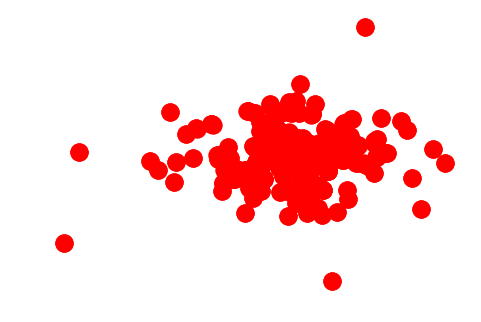

In [240]:
import matplotlib.pyplot as plt

G_Align=nx.Graph()
elist = unique_xmap
G_Align.add_weighted_edges_from(elist)
nx.draw(G_Align)
plt.show()

## compare node and edge connectivity
## compute largest connected component

In [241]:
print('Aligned graph have ',G_Align.number_of_nodes(),' nodes.')
print('Aligned graph have ',G_Align.number_of_edges(),' edges.')

Aligned graph have  1055  nodes.
Aligned graph have  2782  edges.


In [242]:
print('Target graph have ',G_target_na.number_of_nodes(),' nodes.')
print('Target graph have ',G_target_na.number_of_edges(), ' edges.')

Target graph have  3677  nodes.
Target graph have  3338  edges.


In [243]:
sum_weight=0
for i in range(len(unique_xmap)):
    sum_weight=sum_weight+ unique_xmap[i][2]
total_weight=0    
for i in range(len(nd1)):
    for j in range(len(nd2)):
        temp=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
        if(temp!=None):
            total_weight=total_weight+int(list(temp.values())[0])
print('Maximum Weight in Aligned graph: ',sum_weight) 
print('Total Weight in Target: ',total_weight)

Maximum Weight in Aligned graph:  323248
Total Weight in Target:  365195


In [244]:
# returns number of different connected components 
print('number of different connected components in Aligned graph: ',nx.number_connected_components(G_Align)) 
print('number of different connected components in Target graph: ',nx.number_connected_components(G_target_na))  

number of different connected components in Aligned graph:  112
number of different connected components in Target graph:  2717


In [245]:
# returns list of nodes in different connected components 
cc_align=list(nx.connected_components(G_Align))
cc_target=list(nx.connected_components(G_target_na))
print(list(nx.connected_components(G_Align))) 
print(list(nx.connected_components(G_target_na)))

[{'sc977', 'sc967', 'mm6403', 'sc2763', 'sc2070', 'mm5034', 'sc1581', 'sc842', 'sc48', 'mm765', 'sc600', 'sc2646', 'sc1431', 'sc423', 'sc3945', 'sc310', 'sc253', 'sc1863', 'mm1347', 'mm2300', 'sc324', 'sc268', 'sc317', 'sc785', 'sc292', 'sc1416', 'sc2292', 'sc2061', 'sc208', 'mm7826', 'sc1650', 'sc363', 'mm504', 'sc2507', 'sc2477', 'mm12658', 'sc61', 'mm6469', 'mm3056', 'mm6199', 'mm3944', 'mm407', 'mm5397', 'sc237', 'sc2386', 'mm2606', 'sc2285', 'sc1271', 'sc3074', 'mm271', 'sc357', 'mm5361', 'sc3225', 'sc1793', 'sc757', 'mm6564', 'mm9112', 'mm11476', 'sc1320', 'sc86', 'sc1128', 'sc2378', 'sc126', 'sc3255', 'sc1812', 'sc3287', 'sc4682', 'sc648', 'sc2170', 'sc499', 'sc149', 'sc1892', 'mm2123', 'sc2144', 'mm8699', 'sc3223', 'sc82', 'sc1786', 'sc260', 'sc2127', 'sc1193', 'sc1585', 'mm2999', 'mm6119', 'sc3273', 'mm1051', 'sc1225', 'sc194', 'sc42', 'sc630', 'sc1561', 'mm14749', 'sc303', 'sc4944', 'sc330', 'sc3919', 'mm3821', 'sc248', 'sc2736', 'sc1405', 'sc1443', 'sc3521', 'mm11243', 'sc19

In [246]:
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(G_Align)) 
print(nx.node_connectivity(G_target_na))
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(G_Align))
print(nx.edge_connectivity(G_target_na))

0
0
0
0


## check similarity of connected components

In [247]:
count=0
for i in range(len(cc_align)):
    for j in range(len(cc_target)):
        if(cc_align[i]==cc_target[j]):
            count=count+1
print(count)

110


In [248]:
Gc = max(nx.connected_component_subgraphs(G_Align), key=len)
print('Largest common connected graph in Aligned graph: ',len(Gc))
Gct = max(nx.connected_component_subgraphs(G_target_na), key=len)
print('Largest common connected graph in Target graph: ',len(Gct))

Largest common connected graph in Aligned graph:  303
Largest common connected graph in Target graph:  317


### check for mistake align

In [55]:
for i in range(len(unique_xmap)):
    if (G_target_na.has_edge(unique_xmap[i][0], unique_xmap[i][1])==False):
        print(unique_xmap[i])
        print(i)
print('no exist error')    

no exist error


# draw graphs

In [0]:
nx.draw_networkx(G1, with_labels = True)

In [0]:
nx.draw_networkx(G2)

In [0]:
import matplotlib.pyplot as plt
nx.draw(G_target_na)
plt.show()

In [249]:
# total ec
total_ec=G_target_na.number_of_edges()/G1.number_of_edges()*100
ratio_ec=score_ec_temp/total_ec*100
print("total EC: ",total_ec)
print("ratio EC: ",ratio_ec)

total EC:  189.6590909090909
ratio EC:  83.34331935290594


In [250]:
# total ics
total_ics=G_target_na.number_of_edges()/count_induced*100
ratio_ics=score_ics_temp/total_ics*100
print("total ICS: ",total_ics)
print("ratio ICS: ",ratio_ics)

total ICS:  53.7001287001287
ratio ICS:  83.34331935290594


In [251]:
# total s3
total_s3=(G_target_na.number_of_edges()/(G1.number_of_edges()+count_induced-G_target_na.number_of_edges()))*100
ratio_s3=score_s3_temp/total_s3*100
print("total S3: ",total_s3)
print("ratio S3: ",ratio_s3)

total S3:  71.97067701595515
ratio S3:  74.42170103172464


# compute FC

In [1]:
import pickle
with open('mm-sc-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

In [2]:
tree=[[unique_xmap[i][0],unique_xmap[i][1]] for i in range(len(unique_xmap))]
tree

[['mm11243', 'sc3017'],
 ['mm8699', 'sc194'],
 ['mm8967', 'sc1271'],
 ['mm1631', 'sc339'],
 ['mm18233', 'sc4676'],
 ['mm18269', 'sc4619'],
 ['mm3405', 'sc3408'],
 ['mm32', 'sc171'],
 ['mm5138', 'sc1429'],
 ['mm6978', 'sc4558'],
 ['mm4709', 'sc1418'],
 ['mm4991', 'sc697'],
 ['mm2454', 'sc288'],
 ['mm4751', 'sc590'],
 ['mm6126', 'sc126'],
 ['mm28', 'sc171'],
 ['mm11480', 'sc894'],
 ['mm6549', 'sc2193'],
 ['mm13853', 'sc4679'],
 ['mm5361', 'sc3102'],
 ['mm831', 'sc786'],
 ['mm407', 'sc2606'],
 ['mm1377', 'sc1317'],
 ['mm12463', 'sc2794'],
 ['mm2348', 'sc531'],
 ['mm8863', 'sc3182'],
 ['mm17603', 'sc4744'],
 ['mm4294', 'sc1786'],
 ['mm5895', 'sc4627'],
 ['mm6126', 'sc1367'],
 ['mm17071', 'sc4618'],
 ['mm1051', 'sc694'],
 ['mm5518', 'sc3569'],
 ['mm2454', 'sc4'],
 ['mm6435', 'sc143'],
 ['mm5688', 'sc400'],
 ['mm1598', 'sc4550'],
 ['mm12658', 'sc1663'],
 ['mm1472', 'sc659'],
 ['mm3398', 'sc3010'],
 ['mm603', 'sc216'],
 ['mm3055', 'sc805'],
 ['mm407', 'sc2616'],
 ['mm12463', 'sc5341'],
 ['mm6

# load ontology and create DAG graph

In [3]:
import pandas as pd
f=open('go.dag.obo.txt').readlines()
df=pd.DataFrame(f)
df

,0
0,GO:0046431 GO:0019599\n
1,GO:0046430 GO:0019595\n
2,GO:0046432 GO:0019361\n
3,GO:0034198 GO:0060733\n
4,GO:0046343 GO:0019872\n
5,GO:0034193 GO:0034195\n
6,GO:0034192 GO:0034194\n
7,GO:0034190 GO:0034191\n
8,GO:0046437 GO:0030632 GO:0070179\n
9,GO:0046340 GO:0046342\n


In [4]:
# preprocessing
dag_list=[]
for i in range(len(df[0])):
    m1=str(df[0][i])
    m1=m1.replace('GO:','')
    m1=m1.replace('\n','')
    s=m1.split(' ')
    dag_list.append(s)
dag_list

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658', '0030853', '0045643', '0030854', '0045640'],
 ['0030853', '0045659', '0045644', '0045641'],
 ['0030851', '0030221', '0030223', '0030222'],
 ['0030856',
  '0003339',
  '0030860',
  '0045601',
  '0030857',
  '0072182',
  '0030858',
  '0045616'],
 ['0030857', '0045602', '0030861', '0045617', '0072183'],
 ['0030854', '0045645', '0045642', '0045660'],
 ['0030855',
  '0030859',
  '0030216',
  '0072192',
  '0060671',
  '0072160',
  '0060742',
  '0035026',
  '0072311',
  '0060487',
  '0045446',
  '0060644',
  '0002065'],
 ['0030858', '0045603', '0030862', '0045618'],
 ['0030859', '0045198'],
 ['0031106', '0032186'],
 ['0031105', '0032151', '0032152'],
 ['0031103', '0014814', '0048673', '0014012'],
 ['0031102', '00

In [5]:
dag_nd=[]
for i in range(len(dag_list)):
    for j in range(len(dag_list[i])):
        dag_nd.append(dag_list[i][j])
dag_nodes=set(dag_nd)
print(dag_nodes)
print(len(dag_nodes))

{'0050146', '0019557', '0015799', '0019010', '0044022', '0035003', '0002123', '0031817', '0033540', '0007174', '0006990', '0019854', '0031809', '0070933', '0030807', '0009175', '0045356', '0032918', '0019692', '0004726', '0033204', '0010069', '0043290', '0047806', '0022409', '0035362', '0043007', '0045314', '0008541', '0014076', '0031288', '0019828', '0071186', '0045114', '0042972', '0008718', '0031930', '0003239', '0045408', '0042925', '0031005', '0052456', '0045281', '0046196', '0010597', '0044155', '0051762', '0071464', '0006176', '0010472', '0046813', '0042952', '0004991', '0015065', '0042389', '0045104', '0008864', '0016204', '0035459', '0018136', '0052238', '0071339', '0002137', '0003961', '0035479', '0004853', '0033870', '0015226', '0035269', '0032200', '0034563', '0050240', '0060323', '0002104', '0044015', '0046568', '0035559', '0051822', '0047450', '0031472', '0050085', '0005797', '0051184', '0050967', '0016495', '0005745', '0060144', '0075092', '0018175', '0018748', '0050551'

In [6]:
# create dag edges
dag_edges=[]
for i in range(len(dag_list)):
    for j in range(1,len(dag_list[i])):
        ed=[dag_list[i][0],dag_list[i][j]]
        dag_edges.append(ed)
dag_edges

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632'],
 ['0046437', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658'],
 ['0030852', '0030853'],
 ['0030852', '0045643'],
 ['0030852', '0030854'],
 ['0030852', '0045640'],
 ['0030853', '0045659'],
 ['0030853', '0045644'],
 ['0030853', '0045641'],
 ['0030851', '0030221'],
 ['0030851', '0030223'],
 ['0030851', '0030222'],
 ['0030856', '0003339'],
 ['0030856', '0030860'],
 ['0030856', '0045601'],
 ['0030856', '0030857'],
 ['0030856', '0072182'],
 ['0030856', '0030858'],
 ['0030856', '0045616'],
 ['0030857', '0045602'],
 ['0030857', '0030861'],
 ['0030857', '0045617'],
 ['0030857', '0072183'],
 ['0030854', '0045645'],
 ['0030854', '0045642'],
 ['0030854', '0045660'],
 ['0030855', '0030859'],
 ['0030855', '0030216'],
 ['0030855', '0072192'],
 ['0030855', '0060671'],


In [7]:
import networkx as nx
go=nx.DiGraph()
go.add_nodes_from(dag_nodes)
go.add_edges_from(dag_edges)
go

In [8]:
c=0
import numpy as np
na=tree
for i in range(len(tree)):
    for j in range(2):
        if ('sc' in tree[i][j] or 'mm' in tree[i][j]):
            s=tree[i][j][2:]
            x='0'*(7-len(s))
            y=x+s
            #print(y)
            na[i][j]=y
            c=c+1
print(len(tree),c)
print(len(na))

2786 5572
2786


In [9]:
fc=[]
for i in range(len(na)):
    if na[i][0] in dag_nodes:
        e=go.predecessors(na[i][0])
        if na[i][1] in dag_nodes: 
            f=go.predecessors(na[i][1])
            temp=[]
            for key in e:
                temp.append(key)
            for key in f:
                temp.append(key)
            # compute intersection/union 
            fc.append(sum([temp.count(temp[z])/len(temp) for z in range(len(temp))]))
        else:
            fc.append(0)
#print(fc)
# compute average of all fc 
func=np.average(fc)
print('functional coherence:',func)

functional coherence: 0.6311953352769679
